# Raghavendra Kharosekar

# The Sparks Foundation- Task 1 

# Linear Regression with Python Scikit Learn 

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Firstly, we import all the required libs.

In [68]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from plotly import __version__
import plotly.express as px

In [69]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [70]:
init_notebook_mode(connected=True)
cf.go_offline()

Loading the data.

In [71]:
df = pd.read_csv('data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


'CLEANING THE DATA' 

Dropping null values if any.

In [72]:
df = df.dropna()

Splitting the Data into train and test sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df['Hours'], df['Scores'], test_size=0.33)
X_train = X_train
X_test =X_test
y_train=y_train
y_test=y_test


DATA VISUALIZATION

Visualizing the dataset by ploting 'No. of hours' vs 'Scores'


In [74]:
fig = df.iplot(x = 'Hours',y = 'Scores',kind='scatter',mode ='markers',title='No_of_Hours vs Score')


Above figure shows that there is almost a linear relation between 'No of Hours studied' and 'Score'

We use 'Linear Regression' to find an appropriate fit. We train the algorithm using the Train Set .

In [75]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
eqn = LinearRegression()
eqn.fit(X_train , y_train)
print("The linear model is: Y = {} + {}X".format(eqn.intercept_[0], eqn.coef_[0][0]))

The linear model is: Y = 3.5428966912449624 + 9.53389943301302X


Predicting the values on Test Set

In [76]:
X_test= X_test.values.reshape(-1,1)
pred = eqn.predict(X_test)
pred = pred.reshape(1,9)
pd.DataFrame({'Dataset Values':y_test.values,'Predicted':pred[0]})

,Dataset Values,Predicted
0,17,14.030186
1,21,27.377645
2,20,17.843746
3,35,39.771715
4,41,46.445444
5,76,69.326803
6,62,59.792903
7,81,82.674262
8,86,77.907312


Calculating the R^2 Score

In [77]:
print(r2_score(y_test.values, pred[0]))

0.9638259081282247


We obtained an accuracy of almost 96.38%

Plotting the graph with calculated Linear Regression model

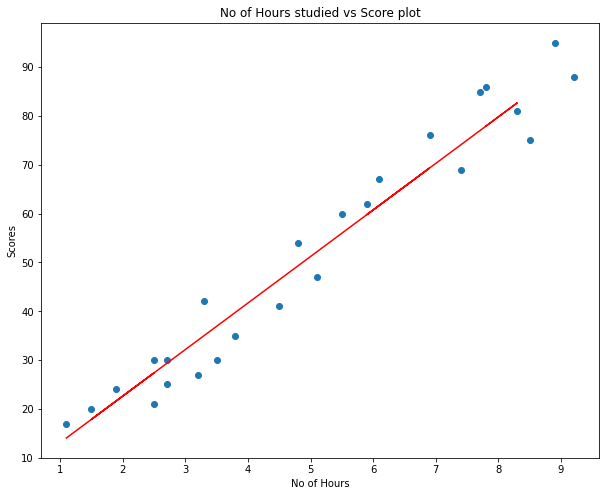

In [78]:
plt.figure(figsize=(10,8));

plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('No of Hours')
plt.ylabel('Scores')
plt.title('No of Hours studied vs Score plot')
plt.plot(X_test,pred.reshape(9,1),c='red')

Predicting the required value (9.25 Hrs/Day) 

In [79]:
print("{:.2f} is the estimated Score that can be obtained if a student studies for 9.25 Hrs/Day ".format(eqn.predict([[9.25]])[0][0]))

91.73 is the estimated Score that can be obtained if a student studies for 9.25 Hrs/Day 
